In [ ]:
#total score and avg score=continous dependent variables
#so it is regression problem

In [ ]:
#we can use total score or avg score as dependent variable nd do regression analysis
#or we cn take math_score as dependent variable and rest all as independent variables and do regression analysis


In [2]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('data\stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math_score'],axis=1)

In [6]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
Y=df['math_score']

In [8]:
Y


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
numeric_features=[feature for feature in X.columns if X[feature].dtype !='O']
categorical_features=[feature for feature in X.columns if X[feature].dtype =='O'] 

In [13]:
#we have categorical independent variables-one hot encoding or label encoding required
#Create column transformer and pipeline to avoid data leakage
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
numeric_Transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OnehotEncoder",oh_transformer,categorical_features),
        ("StandardScaler",numeric_Transformer,numeric_features) 

    ]
)

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [16]:
X.shape

(1000, 19)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [19]:
#Create an evaluation function to calculate r2_score,mae,rmse,mse
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_model(true,pred):
    r2_scr=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    mse=mean_squared_error(true,pred)
    rmse=np.sqrt(mse)
    return r2_scr,mae,mse,rmse

In [20]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models={
    "linear_regression":LinearRegression(),
    "ridge_regression":Ridge(),
    "lasso_regression":Lasso(),
    "K-Neighbors":KNeighborsRegressor(),
    "decision_tree":DecisionTreeRegressor(),
    "random_forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)

    r2_train,mae_train,mse_train,rmse_train=evaluate_model(Y_train,Y_train_pred)
    r2_test,mae_test,mse_test,rmse_test=evaluate_model(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('model performance on training set')
    print(f"R2_score:{r2_train}")
    print(f"MAE:{mae_train}")
    print(f"MSE:{mse_train}")
    print(f"RMSE:{rmse_train}")
    print('\n\n')
    print('model performance on testing set')
    print(f"R2_score:{r2_test}")
    print(f"MAE:{mae_test}")
    print(f"MSE:{mse_test}")
    print(f"RMSE:{rmse_test}")
    r2_list.append(r2_test)
    print('----------------------------------------------')

linear_regression
model performance on training set
R2_score:0.874133112760094
MAE:4.278203125
MSE:28.376373291015625
RMSE:5.326947840087757



model performance on testing set
R2_score:0.879689103789915
MAE:4.227890625
MSE:29.276260986328126
RMSE:5.4107541975521425
----------------------------------------------
ridge_regression
model performance on training set
R2_score:0.8743042615212909
MAE:4.26498782372598
MSE:28.337788233082442
RMSE:5.323324922741654



model performance on testing set
R2_score:0.8805931485028738
MAE:4.21110068801426
MSE:29.05627219234829
RMSE:5.390387016935638
----------------------------------------------
lasso_regression
model performance on training set
R2_score:0.8071462015863458
MAE:5.206302661246526
MSE:43.47840400585578
RMSE:6.593815587795565



model performance on testing set
R2_score:0.8253197323627852
MAE:5.157881810347763
MSE:42.50641683841162
RMSE:6.51969453566742
----------------------------------------------
K-Neighbors
model performance on trainin

In [25]:
pd.DataFrame({'Model':model_list,'R2_score':r2_list}).sort_values(by='R2_score',ascending=False)

,Model,R2_score
1,ridge_regression,0.880593
0,linear_regression,0.879689
7,CatBoostRegressor,0.851632
5,random_forest,0.850443
8,AdaBoostRegressor,0.844448
6,XGBRegressor,0.827797
2,lasso_regression,0.825320
3,K-Neighbors,0.783898
4,decision_tree,0.747615


In [ ]:
#we go with linear regression
#Save the model


In [28]:
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)
Y_pred=lin_model.predict(X_test)
score=r2_score(Y_test,Y_pred)
score

0.879689103789915

Text(0.5, 1.0, 'Actual vs Predicted values')

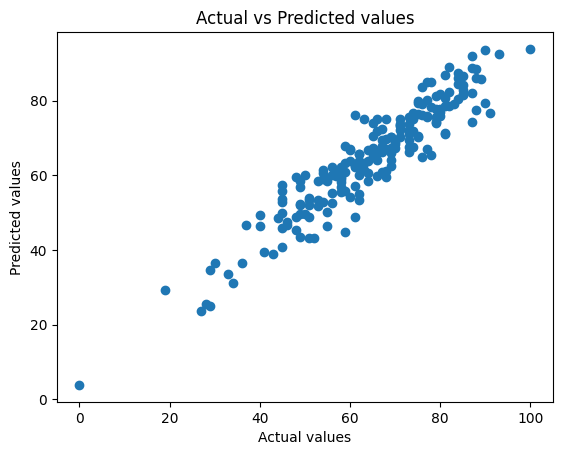

In [29]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("Actual values") 
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted values")

In [30]:
pred_diff=pd.DataFrame({'Actual values':Y_test,'Predicted values':Y_pred,'Difference':Y_test - Y_pred})
pred_diff

,Actual values,Predicted values,Difference
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750
